<a href="https://colab.research.google.com/github/leonistor/ml-manning/blob/master/03-predictive-models/MultipleRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Regression

In [4]:
import pandas as pd

df = pd.read_excel('http://cdn.sundog-soft.com/Udemy/DataScience/cars.xls')

df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


                     Mileage         Price
Mileage                                   
(0, 10000]       5588.629630  24096.714451
(10000, 20000]  15898.496183  21955.979607
(20000, 30000]  24114.407104  20278.606252
(30000, 40000]  33610.338710  19463.670267


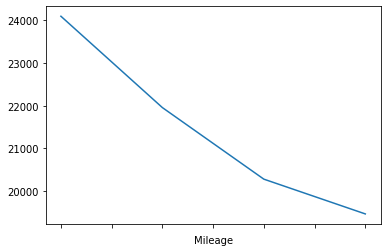

In [10]:
%matplotlib inline
import numpy as np
df1 = df[['Mileage', 'Price']]
bins = np.arange(0,50_000, 10_000)
groups = df1.groupby(pd.cut(df1['Mileage'], bins)).mean()
print(groups.head())
groups['Price'].plot.line()

In [26]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

X = df[['Mileage', 'Cylinder', 'Doors']]
y = df['Price']

# normalize features to -1..1

X = scale.fit_transform(X)

print(X)

# Ordinary Least Square model
est = sm.OLS(y, X).fit()

est.summary()

[[-1.41748516  0.52741047  0.55627894]
 [-1.30590228  0.52741047  0.55627894]
 [-0.81012759  0.52741047  0.55627894]
 ...
 [ 0.07960546  0.52741047  0.55627894]
 [ 0.75044563  0.52741047  0.55627894]
 [ 1.93256489  0.52741047  0.55627894]]


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.064
Model:                            OLS   Adj. R-squared (uncentered):              0.060
Method:                 Least Squares   F-statistic:                              18.11
Date:                Tue, 28 Apr 2020   Prob (F-statistic):                    2.23e-11
Time:                        17:25:07   Log-Likelihood:                         -9207.1
No. Observations:                 804   AIC:                                  1.842e+04
Df Residuals:                     801   BIC:                                  1.843e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -1272.3412    804.623     -1.581      0.114   -2851.759     307.077
x2          5587.4472    804.509      6.945      0.000    4008.252    7166.642
x3         -1404.5513    804.275     -1.746      0.081   -2983.288     174.185
==============================================================================
Omnibus:                      157.913   Durbin-Watson:                   0.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              257.529
Skew:                           1.278   Prob(JB):                     1.20e-56
Kurtosis:                       4.074   Cond. No.                         1.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
# more doors => lower price?
y.groupby(df.Doors).mean()

Doors
2    23807.135520
4    20580.670749
Name: Price, dtype: float64

In [29]:
# predict the price for a car wit 45_000 miles, 8 cylinders and 4 doors
scaled = scale.transform([[45_000, 8, 4]])
print(scaled)
predicted = est.predict(scaled[0])
print(predicted)

[[3.07256589 1.96971667 0.55627894]]
[6315.01330583]
